<a href="https://colab.research.google.com/github/Calista-F/D-and-C/blob/master/RM_0810.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import libraries and mount google drive**


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
df.head()

,ty,tq,tm,entry,hscode,goodsdescription,p,q,m_fob,m_cif,fx_usd,dutiablevalueforeign,exchangerate,currency,dutiablevaluephp,dutypaid,exciseadvalorem,arrastre,wharfage,vatbase,vatpaid,othertax,finesandpenalties,dutiestaxes,prefcode,countryorigin_iso3,countryexport_iso3,subport,port
uid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012q1 00000001,2012,2012q1,NaN,C,15119090000,PALM OLEIN IN BULK,0.973596,2499867.0,2433859.800,2486856.300,1.0,2486856.15,43.921,USD,109225209,0,0,274985,NaN,112934962,13552195,NaN,NaN,13552195,AFTA,MYS,MYS,NaN,NaN
2012q1 00000002,2012,2012q1,NaN,C,27111900000,LIQUIFIED PETROLEUM GAS,0.915000,820000.0,750300.000,750300.000,1.0,750300.00,44.023,USD,33030457,0,0,6560,NaN,33099646,3971957,NaN,NaN,3971957,NaN,CHN,CHN,NaN,NaN
2012q1 00000003,2012,2012q1,NaN,C,15119090000,COPRA IN BULK,0.964095,2499831.0,2410073.500,2410073.500,1.0,2410073.54,42.193,USD,101688233,0,0,274981,NaN,109299809,13115977,NaN,NaN,13115977,AFTA,MYS,MYS,NaN,NaN
2012q1 00000004,2012,2012q1,NaN,C,15119090000,PALM OLEIN IN BULK,0.996198,2499948.0,2490444.000,2561692.500,1.0,2561692.59,42.687,USD,109350971,0,0,274994,NaN,113043254,13565190,NaN,NaN,13565190,AFTA,MYS,MYS,NaN,NaN
2012q1 00000005,2012,2012q1,NaN,C,12030000000,COPRA IN BULK,0.639000,120460.0,76973.938,76973.938,1.0,76973.94,43.928,USD,3381311,361800,0,13251,NaN,4006940,480832,NaN,NaN,0,NaN,AUS,AUS,NaN,NaN


**Select 2012 data**


In [ ]:
path = "/content/drive/My Drive/NIP-Data-Computation-Group-Drive/Datasets/PHL Customs Open Data/clean/csv/boc_lite_2012.csv"
df = pd.read_csv(path, index_col = 0)
#print(df.head())
#print(df.info())

#print('The average duty paid per item is: '+ str((df['dutypaid'].sum() /df['p'].sum())))
#print(df[['countryexport_iso3','countryorigin_iso3']])

print('Percentage of import entries from each country:')
print(df['countryorigin_iso3'].value_counts(normalize = True))

print('Percentage of export entries from each country:')
print(df['countryexport_iso3'].value_counts(normalize = True))


Percentage of import entries from each country:
CHN    2.744364e-01
SGP    1.245371e-01
JPN    1.115280e-01
USA    9.421863e-02
KOR    4.302932e-02
           ...     
BLZ    8.377820e-07
SRB    8.377820e-07
TCD    8.377820e-07
KNA    8.377820e-07
CCK    8.377820e-07
Name: countryorigin_iso3, Length: 190, dtype: float64
Percentage of export entries from each country:
CHN    2.678691e-01
SGP    1.304804e-01
JPN    1.095383e-01
USA    9.382153e-02
HKG    4.232307e-02
           ...     
AZE    8.377820e-07
REU    8.377820e-07
ZAR    8.377820e-07
ATG    8.377820e-07
SHN    8.377820e-07
Name: countryexport_iso3, Length: 184, dtype: float64


**Show bar chart of top importers based on number of entries**


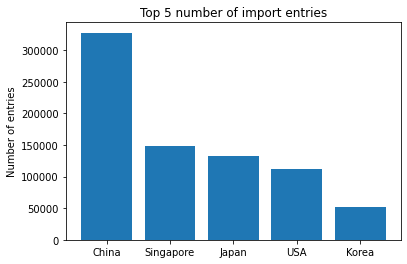

In [ ]:
fr_chn = len(df[df['countryorigin_iso3'] == 'CHN'])
fr_sgp = len(df[df['countryorigin_iso3'] == 'SGP'])
fr_jpn = len(df[df['countryorigin_iso3'] == 'JPN'])
fr_usa = len(df[df['countryorigin_iso3'] == 'USA'])
fr_kor = len(df[df['countryorigin_iso3'] == 'KOR'])
fr_countries = [fr_chn, fr_sgp, fr_jpn, fr_usa, fr_kor]
countries = ['China', 'Singapore', 'Japan', 'USA', 'Korea']
plt.bar(countries, fr_countries)
plt.title('Top 5 number of import entries')
plt.ylabel('Number of entries')
plt.show()
#Make horizontal

**Create a column for price * quantity and summing per country and getting the total values and mean values**


In [ ]:
df['pq'] = df['p'] * df['q']
pricequant_sum = df.groupby('countryorigin_iso3')['pq'].sum()
print('TOTAL VALUE: ' + str(pricequant_sum.sort_values(ascending = False).head()))

pricequant_mean = df.groupby('countryorigin_iso3')['pq'].mean()
print('MEAN VALUE: ' + str(pricequant_mean.sort_values(ascending = False).head()))

TOTAL VALUE: countryorigin_iso3
CHN    6.823864e+09
KOR    4.091644e+09
THA    3.704019e+09
USA    3.558132e+09
SAU    3.493042e+09
Name: pq, dtype: float64
MEAN VALUE: countryorigin_iso3
RUS    4.057765e+06
SAU    3.680761e+06
TTO    3.400000e+06
LBR    2.633447e+06
IRN    2.615385e+06
Name: pq, dtype: float64


**Show bar chart of total value of goods in top 5 countries (using lists)**


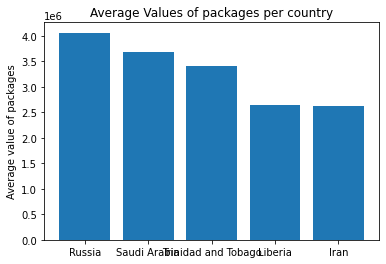

In [ ]:
mean_values = [4.057765e+06,3.680761e+06, 3.400000e+06,2.633447e+06,2.615385e+06 ]
mean_countries = ['Russia', 'Saudi Arabia', 'Trinidad and Tobago', 'Liberia', 'Iran']
plt.bar(mean_countries, mean_values)
plt.ylabel('Average value of packages')
plt.title('Average Values of packages per country')
plt.show()

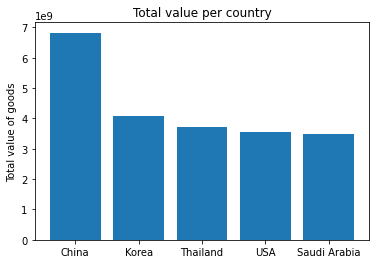

In [ ]:
sum_values = [6.823864e+09,4.091644e+09, 3.704019e+09,3.558132e+09,3.493042e+09 ]
sum_countries = ['China', 'Korea', 'Thailand', 'USA', 'Saudi Arabia']
plt.bar(sum_countries, sum_values)
plt.ylabel('Total value of goods')
plt.title('Total value per country')
plt.show()

**Price and quantity per country **

In [ ]:
quant = df.groupby('countryorigin_iso3')['q'].sum()
print(quant.sort_values(ascending = False))

countryorigin_iso3
USA    2.972578e+10
IDN    1.205431e+10
CHN    7.463708e+09
KOR    3.732634e+09
SAU    3.731482e+09
           ...     
KGZ    1.047000e+01
NIC    9.000000e+00
SUR    8.760000e+00
MDA    3.000000e+00
GRL    3.000000e+00
Name: q, Length: 190, dtype: float64


In [ ]:
price = df.groupby('countryorigin_iso3')['p'].sum()
print(price.sort_values(ascending = False))

countryorigin_iso3
IRL    2.344530e+10
SGP    8.999064e+07
USA    8.056603e+07
FIN    7.050621e+07
CHN    4.462691e+07
           ...     
YEM    6.784692e-01
ALB    5.496747e-01
BHS    5.095087e-01
VAT    4.707000e-01
BLZ    1.000000e-01
Name: p, Length: 190, dtype: float64


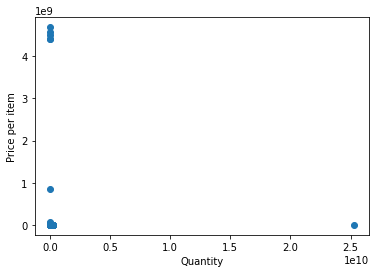

In [27]:
plt.scatter(df['q'], df['p'])
plt.xlabel('Quantity')
plt.ylabel('Price per item')
plt.show()



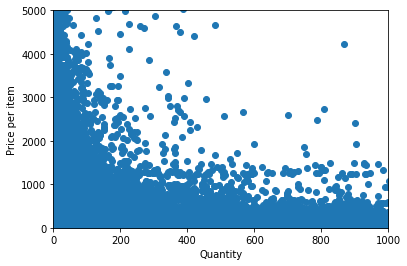

In [31]:
plt.scatter(df['q'], df['p'])
plt.xlabel('Quantity')
plt.ylabel('Price per item')
plt.ylim(0, 5000)
plt.xlim(0,1000)
plt.show()

**Check what countries sent the packages with high prices per item**


In [ ]:
print(df[df['p'] > 50000000][['countryorigin_iso3','goodsdescription']])

                countryorigin_iso3             goodsdescription
uid                                                            
2012q1 00103511                FIN  TELECOMMUNICATIONS EQUPMENT
2012q1 00104978                IRL            AIRCRAFT A320-200
2012q1 00124283                IRL            AIRCRAFT A320-200
2012q1 00124288                IRL            AIRCRAFT A320-232
2012q2 00120327                IRL              A320-200 AIRBUS
2012q4 00143714                IRL              AIRBUS A320-200
2012q4 00192328                IRL            AIRBUS DHC 8-Q314


**Check what countries sent packages with high quantity of goods**


In [ ]:
print(df[df['q'] > 500000000][['countryorigin_iso3','goodsdescription']])

                countryorigin_iso3              goodsdescription
uid                                                             
2012q4 00311929                USA  BETTER NORTHERN SPRING WHEAT


In [ ]:
ave_price = df.groupby('countryorigin_iso3')['p'].mean()
print("The average price per item imported ")
print(ave_price.sort_values(ascending = False))

The average price per item imported 
countryorigin_iso3
IRL    1.557828e+07
FIN    3.040371e+04
AUS    2.339819e+03
MEX    1.573495e+03
AGO    1.457781e+03
           ...     
ALB    5.496747e-01
BHS    5.095087e-01
VAT    4.707000e-01
SLB    3.200966e-01
BLZ    1.000000e-01
Name: p, Length: 190, dtype: float64
